In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('data/tv_shows.csv')
platform_names = ['Netflix', 'Disney+', 'Prime Video', 'Hulu']
platform_colors = ['#E50914', '#0063B1', '#00A8E1', '#1CE783']
platform_counts = [df[platform].sum() for platform in platform_names]

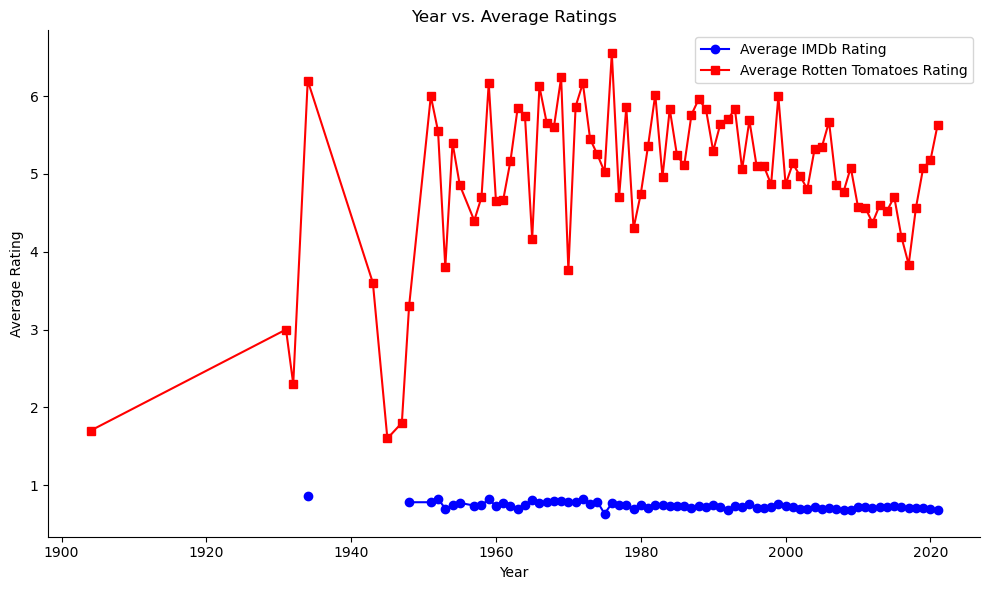

In [4]:
# Normalize the values of the two features
df['IMDb'] = df['IMDb'].str.replace('/10', '').astype(float) / 10
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].str.replace('/100', '').astype(float) / 10

# Calculate the average IMDb rating per year
average_imdb_per_year = df.groupby('Year')['IMDb'].mean().reset_index()
average_rt_per_year = df.groupby('Year')['Rotten Tomatoes'].mean().reset_index()

# Plot the line chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(average_imdb_per_year['Year'], average_imdb_per_year['IMDb'], marker='o', linestyle='-', color='b', label='Average IMDb Rating')
ax.plot(average_rt_per_year['Year'], average_rt_per_year['Rotten Tomatoes'], marker='s', linestyle='-', color='r', label='Average Rotten Tomatoes Rating')
ax.set_xlabel('Year')
ax.set_ylabel('Average Rating')
ax.set_title('Year vs. Average Ratings')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend()
plt.tight_layout()
plt.show()

/var/folders/3n/vf15kv6n675_m6mzk8p8rfxr0000gn/T/ipykernel_230/1811532320.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['IMDb'] = filtered_df['IMDb'].str.replace('/10', '').astype(float)


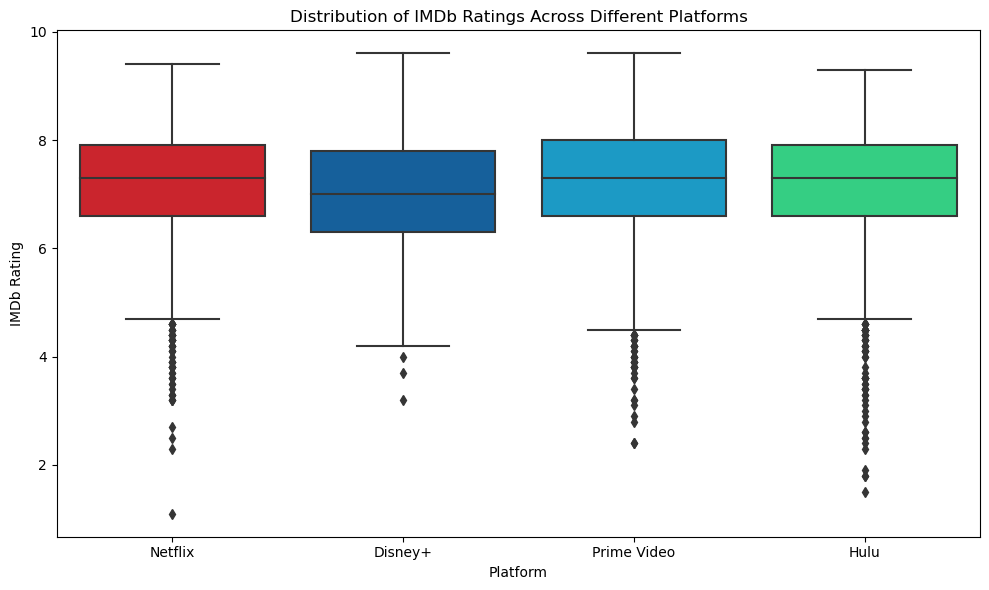

In [643]:
# Create a box plot for IMDb ratings across different platforms
fig, ax = plt.subplots(figsize=(10, 6))

# Filter out rows with NaN IMDb ratings
filtered_df = df.dropna(subset=['IMDb'])

# Convert IMDb ratings to numeric values
filtered_df['IMDb'] = filtered_df['IMDb'].str.replace('/10', '').astype(float)

# Create the box plot
sns.boxplot(x='Platform', y='IMDb', data=filtered_df.melt(id_vars=['IMDb'], value_vars=platform_names, var_name='Platform', value_name='Available').query('Available == 1'), palette=platform_colors, ax=ax)

# Set plot title and labels
ax.set_title('Distribution of IMDb Ratings Across Different Platforms')
ax.set_xlabel('Platform')
ax.set_ylabel('IMDb Rating')

plt.tight_layout()
plt.show()

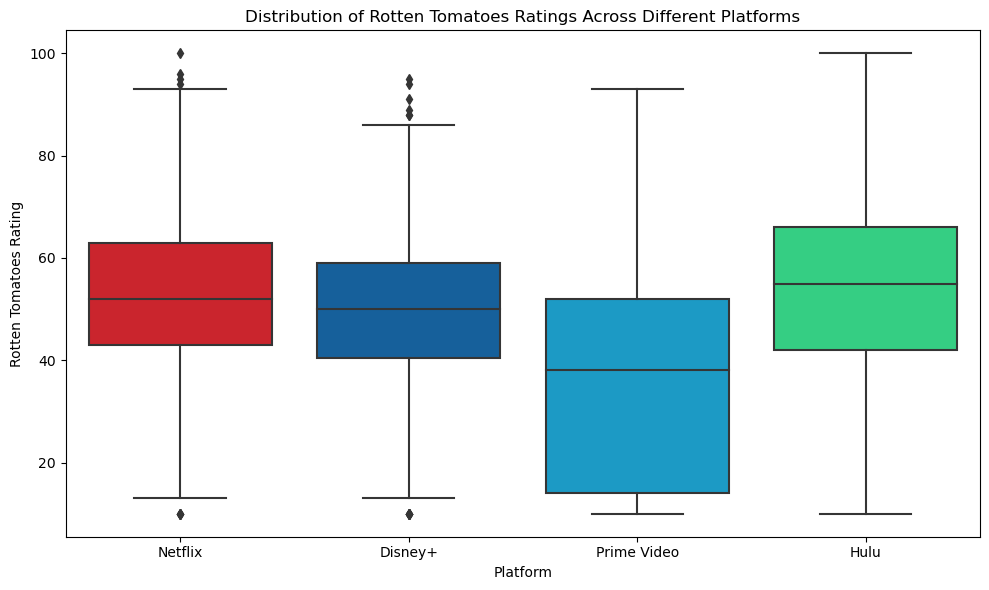

In [644]:
# Create a box plot for Rotten Tomatoes ratings across different platforms
fig, ax = plt.subplots(figsize=(10, 6))

# Filter out rows with NaN Rotten Tomatoes ratings
filtered_df = df.dropna(subset=['Rotten Tomatoes'])

# Convert Rotten Tomatoes ratings to numeric values
filtered_df['Rotten Tomatoes'] = filtered_df['Rotten Tomatoes'].str.replace('/100', '').astype(float)

# Create the box plot
sns.boxplot(x='Platform', y='Rotten Tomatoes', data=filtered_df.melt(id_vars=['Rotten Tomatoes'], value_vars=platform_names, var_name='Platform', value_name='Available').query('Available == 1'), palette=platform_colors, ax=ax)

# Set plot title and labels
ax.set_title('Distribution of Rotten Tomatoes Ratings Across Different Platforms')
ax.set_xlabel('Platform')
ax.set_ylabel('Rotten Tomatoes Rating')

plt.tight_layout()
plt.show()